> 기초적 통계이론 : 적합결여검정 / 등

In [2]:
install.packages('gap')
library(gap)

also installing the dependencies ‘crosstalk’, ‘rbibutils’, ‘gap.datasets’, ‘plotly’, ‘Rdpack’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: gap.datasets

gap version 1.5-3



In [1]:
options(repr.plot.width = 15, repr.plot.height = 8)

## 1. 적합결여검정

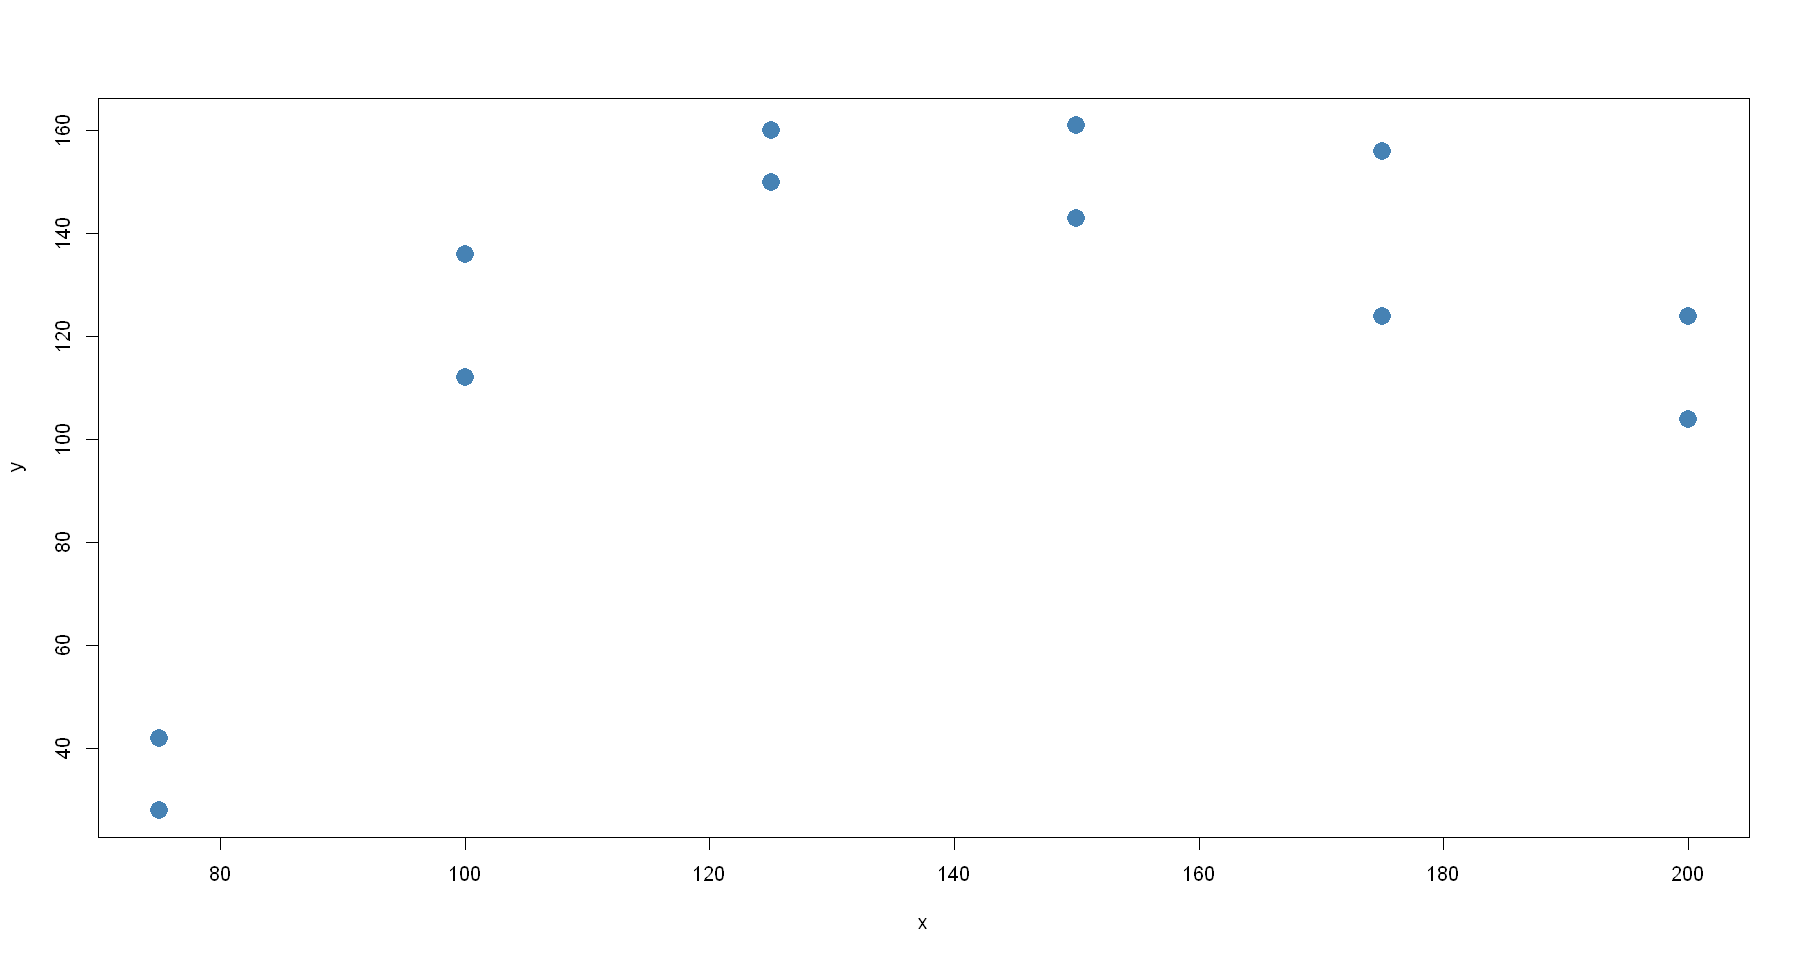

In [2]:
x <- rep(c(75,100,125,150,175,200),2)
y <- c(28,112,160,143,156,124,42,136,150,161,124,104)
plot(x,y,col='steelblue',pch=16, cex=2)

> 그냥 적합

In [3]:
lm_fit <- lm(y~x)
summary(lm_fit)


Call:
lm(formula = y ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-60.57 -32.21  13.79  34.75  46.29 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  50.8571    38.4861   1.321   0.2158  
x             0.5029     0.2673   1.881   0.0893 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.54 on 10 degrees of freedom
Multiple R-squared:  0.2614,	Adjusted R-squared:  0.1875 
F-statistic: 3.539 on 1 and 10 DF,  p-value: 0.08935


In [4]:
anova(lm_fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,5531.429,5531.429,3.538852,0.08934951
Residuals,10,15630.571,1563.057,NA,NA


* 적합결여검정의 가설 : $H_0 : E(Y|X = x) = \beta_0 + \beta_1 x, vs. H_1 : E(Y|X = x) ≠ \beta_0 + \beta_1 x$

* 검정통계량 : $F_0 = \frac{MSLF}{MSPE} ∼ _{H_0} F(k-2, n-k)$

`-` SST 구하기

In [6]:
anova(lm(y~1))  ## unconditional estimate와 동일하다. y_hat이 y_bar가 되니까.
sum((y - mean(y))**2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Residuals,11,21162,1923.818,NA,NA


[1] 21162

> SST = 21162(직접 계산한 값과 동일)

`-` SSPE 구하기(SSE = SSPE + SSLF)

In [8]:
anova(lm(y~factor(x)))  ## factor, 그룹으로 나누어 넣겠다. 즉, 각각 그룹에서의 평균을 이용한 편차의 제곱을 구함
## set()과 비슷한듯.

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
factor(x),5,19852,3970.4000,18.18504,0.00144967
Residuals,6,1310,218.3333,NA,NA


> SSPE = 1310, MSPE = 218.3, SSPE의 자유도 = 6

In [13]:
SSPE <- anova(lm(y~factor(x)))$'Sum Sq'[2]
MSPE = SSPE/6  ## n-k
MSPE

[1] 218.3333

`-` SSLF 구하기

In [11]:
anova(lm_fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,5531.429,5531.429,3.538852,0.08934951
Residuals,10,15630.571,1563.057,NA,NA


In [15]:
SSE = anova(lm_fit)$'Sum Sq'[2]
SSLF = SSE - SSPE
MSLF = SSLF/4  ## k-2
MSLF

[1] 3580.143

`-` 검정통계량

In [16]:
F0 = MSLF/MSPE; F0

[1] 16.3976

`-` 유의확률(p-value)

In [19]:
pf(q = F0, df1 = 4, df2 = 6, lower.tail = FALSE)  ## 유의확률, probability distribution function

[1] 0.002206759

In [20]:
qf(0.95, 4, 6)  ## 유의수준 0.05에서의 기각치, critical value

[1] 4.533677

> 결론 : $F_0 = 16.4 > F_{0.05}(4, 6) = 4.534$ 이므로 귀무가설을 기각. 즉, 선형 회귀 모형이 적합하지 않다.

## 2. 두 회귀모형의 검정

두 회귀모형의 비교에 대한 가설 : $$H_0 : \beta_{01} = \beta_{02} ~ _{and} ~ \beta_{11} = \beta_{12}, ~~ vs. ~~ H_1 : \beta_{01} ≠ \beta_{02} ~ _{or} ~ \beta_{11} ≠ \beta_{12}$$

In [1]:
dt <- data.frame(
    x = c(100, 125, 220, 205, 300, 255, 225, 175, 270, 170, 155, 190, 140, 290, 265,
         105, 215, 270, 255, 175, 135, 200, 275, 155, 320, 190, 295),
    y = c(218, 248, 360, 351, 470, 394, 332, 321, 410, 260, 241, 331, 275, 425, 367,
         140, 277, 384, 341, 215, 180, 260, 361, 252, 422, 273, 410),
    g = c(rep('Line1', 15), rep('Line2', 12))
)

head(dt)

,x,y,g
,<dbl>,<dbl>,<chr>
1,100,218,Line1
2,125,248,Line1
3,220,360,Line1
4,205,351,Line1
5,300,470,Line1
6,255,394,Line1


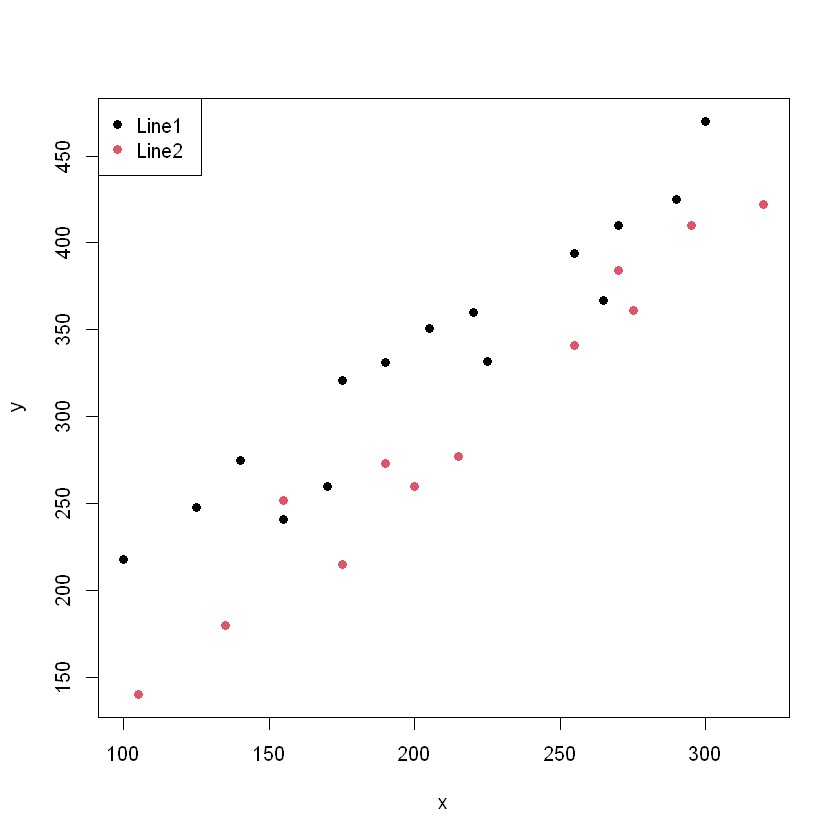

In [2]:
plot(y~x, data = dt,
    col = as.factor(dt$g), pch = 16)
legend('topleft', legend = c('Line1', 'Line2'), col = 1:2, pch = 16)

`-` 각 모델을 적합하면...

In [6]:
full_model1 <- lm(y~x, data = dt[dt$g == "Line1",])  ## python과 다르게 인자 없이 쉼표만 넣어도...
full_model2 <- lm(y~x, data = dt[dt$g == "Line2",])
reduced_model <- lm(y~x, data = dt)

In [7]:
summary(full_model1)
summary(full_model2)


Call:
lm(formula = y ~ x, data = dt[dt$g == "Line1", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-34.500 -14.403   5.496  16.046  28.418 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 97.96533   20.51430   4.775 0.000362 ***
x            1.14539    0.09578  11.959 2.18e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.19 on 13 degrees of freedom
Multiple R-squared:  0.9167,	Adjusted R-squared:  0.9103 
F-statistic:   143 on 1 and 13 DF,  p-value: 2.177e-08



Call:
lm(formula = y ~ x, data = dt[dt$g == "Line2", ])

Residuals:
   Min     1Q Median     3Q    Max 
-23.93 -10.60  -6.22  12.88  39.51 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.57446   18.81855   0.402    0.696    
x            1.32205    0.08352  15.829 2.08e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.71 on 10 degrees of freedom
Multiple R-squared:  0.9616,	Adjusted R-squared:  0.9578 
F-statistic: 250.6 on 1 and 10 DF,  p-value: 2.083e-08


`-` 개별 회귀직선(Full Model)과 전체 회귀직선(Reduced Model)을 산점도에 표기.

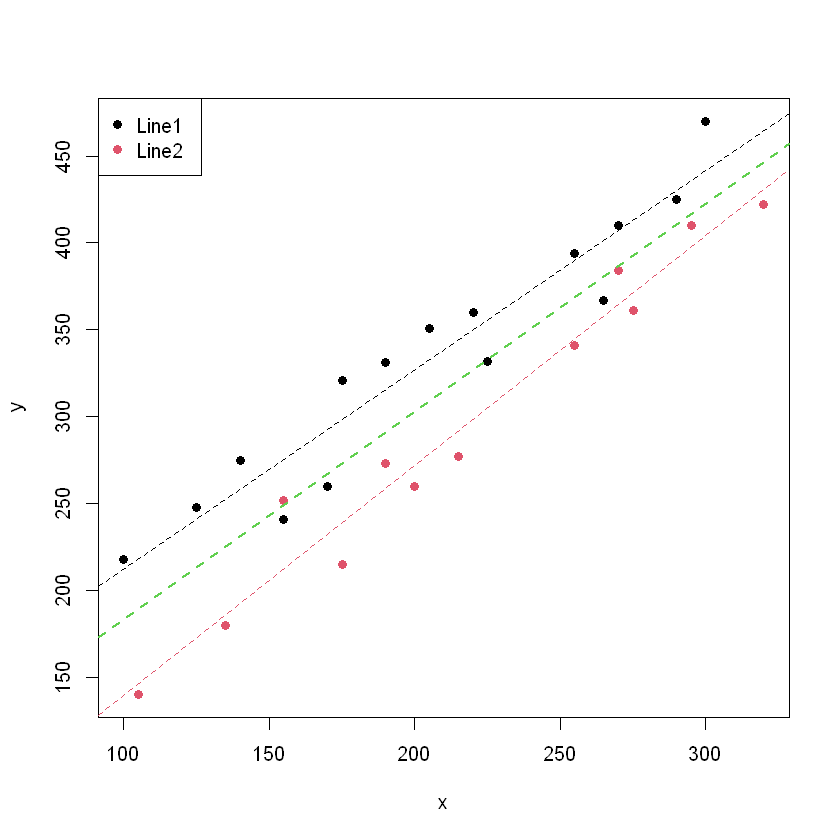

In [12]:
plot(y ~ x, data = dt, col = as.factor(dt$g), pch = 16)
legend('topleft', legend = c('Line1', 'Line2'), col = 1:2, pch = 16)
abline(full_model1, col = 1, lty = 2)
abline(full_model2, col = 2, lty = 2)
abline(reduced_model, col = 3, lty = 2, lwd = 2)

`-` 설명변수와 반응변수를 그룹별로 분할...

In [18]:
y1 <- dt[dt$g=='Line1', 'y']
y2 <- dt[dt$g=='Line2', 'y']

x1 <- dt[dt$g=='Line1', 'x']
x2 <- dt[dt$g=='Line2', 'x']

`-` 한번에 통계량 구하기 :  `gap::chow.test(y1, x1, y2, x2)`

In [25]:
gap::chow.test(y1, x1, y2, x2)  ## target1, feature1, target2, feature2

F value        d.f.1        d.f.2      P value 
2.264653e+01 2.000000e+00 2.300000e+01 3.668926e-06

`-` 이론적으로 코드 구현하기

In [29]:
anova(full_model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,70440.942,70440.9424,143.0208,2.177027e-08
Residuals,13,6402.791,492.5224,NA,NA


In [32]:
SSE1 = anova(full_model1)[2,2]
SSE2 = anova(full_model2)[2,2]

SSE_full = SSE1 + SSE2
SSE_reduced = anova(reduced_model)[2,2]

In [34]:
F0 = ((SSE_reduced - SSE_full)/2)/(SSE_full/(15+12-4))
F0

[1] 22.64653

> 모듈에서의 값(`gap::chow.test()`)과 동일함을 알 수 있다.

## 3. 기울기의 비교

기울기 비교에 대한 가설 : $$H_0 : \beta_{11} = \beta_{12}, ~~ vs. ~~ H_1 : \beta_{11} ≠ \beta_{12}$$

검정통계량 : $t_0$

`-` `MSE_full` 계산 (귀무가설 하에서의 분산, 합동분산)

In [38]:
MSE_full = SSE_full/(15+12-4)
MSE_full

[1] 430.6112

`-` 제곱합 계산

In [47]:
Sxx1 = sum(t(x1 - mean(x1))%*%(x1 - mean(x1)))  ## 또는 그냥 sum((x1 - mean(x1))**2)
Sxx2 = sum((x2 - mean(x2))**2)  ## 솔직히 이게 더 짧긴 한데, 아무튼!

`-` $\hat{Var}(\hat{\beta_{11}} - \hat{\beta_{12}})$ 계산

In [40]:
var_hat = MSE_full * (1/Sxx1 + 1/Sxx2)
var_hat

[1] 0.01659916

`-` 검정통계량 산출

In [48]:
t0 = (full_model1$coefficients[2] - full_model2$coefficients[2])/sqrt(var_hat)  ## 귀무가설 하에서 t분포
t0

x 
-1.371193

`-` `p-value` 산출

In [49]:
2*pt(t0, 15+12-4)  ## p-value, 더 극단적인 값이 나올 확률

x 
0.1835463

`-` `critical value` 산출

In [52]:
qt(0.025, 15+12-4, lower.tail = FALSE)  ## 유의수준 0.05에서의 critical value(양측검정)

[1] 2.068658

> 결론 : $|t_0| = 1.3712 < t_{0.025}(23) = 2.069$이므로, 유의수준 $\alpha = 0.05$에서 귀무가설을 기각할 수 없다. 즉, 두 모델의 기울기가 다르다고 할 수 없다.

## 4. Box-Cox 변환

$y = exp(\beta_0 + \beta_1 x + \epsilon) \to log(y) = \beta_0 + \beta_1 x + \epsilon$

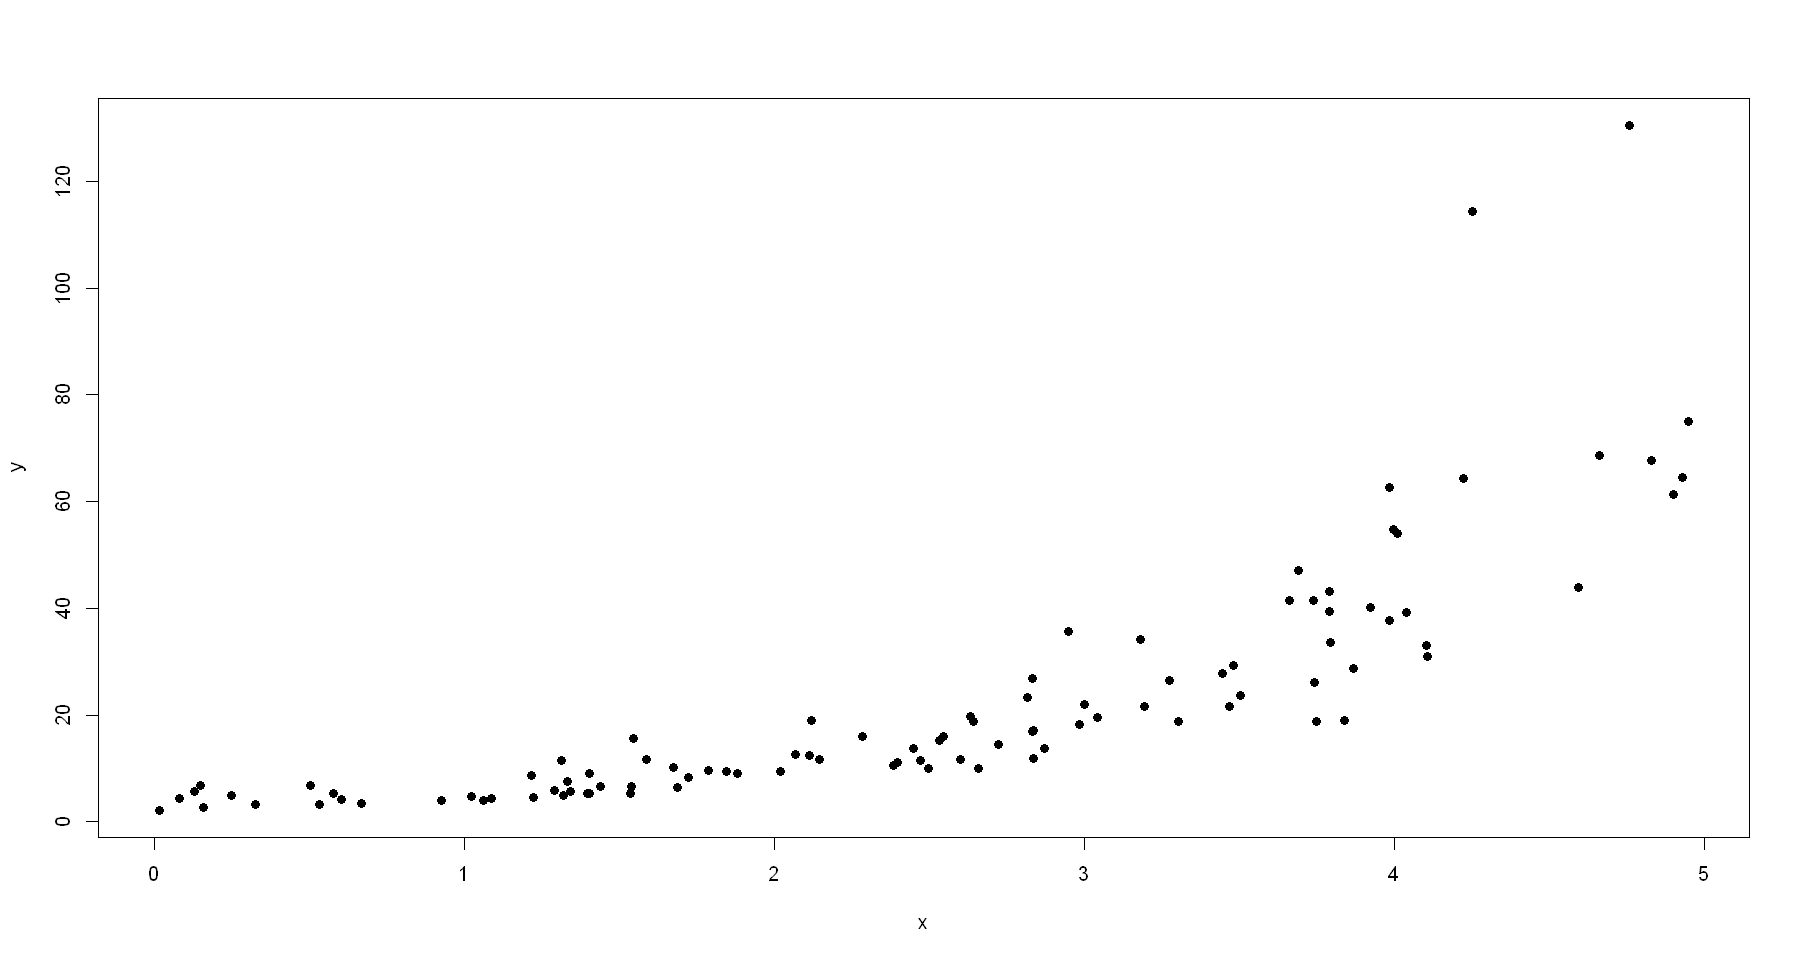

In [53]:
set.seed(1234)

n = 100
beta0 = 1
beta1 = 0.7

e = rnorm(n, 0, sqrt(0.1))
x = runif(n, 0, 5)
y = exp(beta0 + beta1 * x + e)

plot(y~x, pch = 16)

`-` Box Cox Transformation

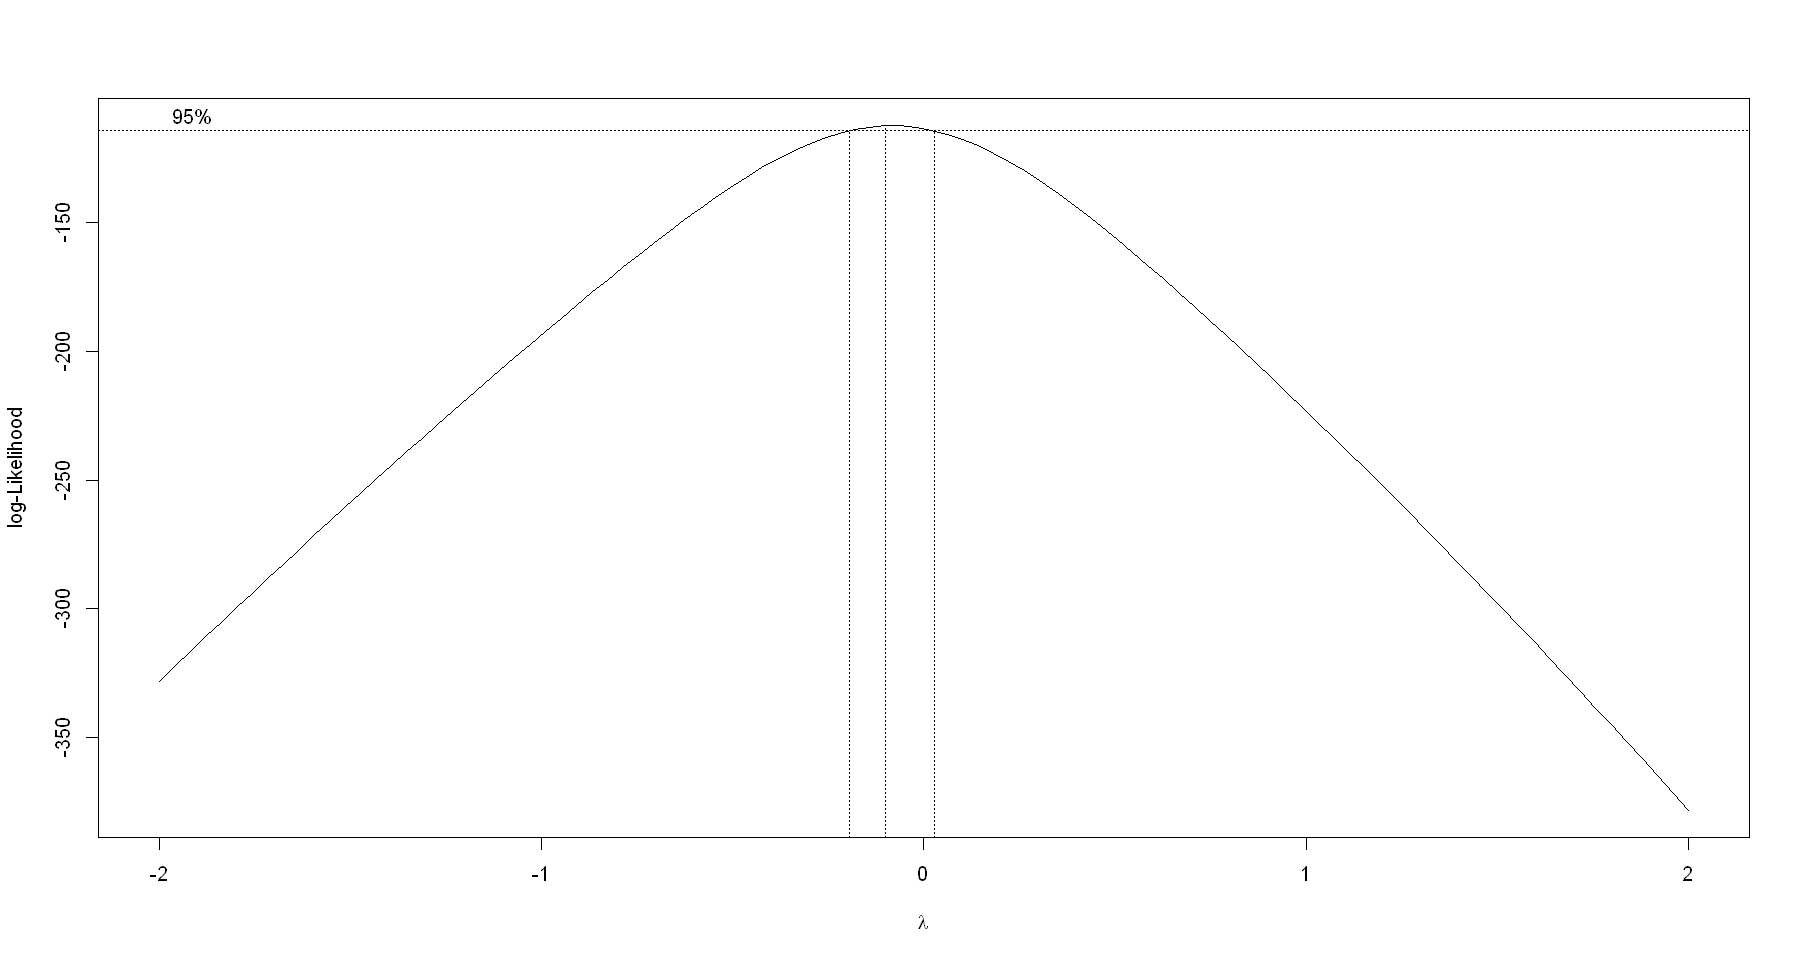

In [54]:
MASS::boxcox(y~x)

> LL의 값이 가장 높은 $\lambda$를 택하여 변환해줘야 한다(양옆은 신뢰구간)
>
> 다만... 신뢰구간이 0을 포함하고 있어 로그변환을 해도 문제가 없다.

In [58]:
a <- MASS::boxcox(y~x, plotit = F)
ls(a)

[1] "x" "y"

In [59]:
a$x  ## 해당 간격으로 lambda 값을 검증했음.

[1] -2.0 -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.0 -0.9 -0.8 -0.7 -0.6
[16] -0.5 -0.4 -0.3 -0.2 -0.1  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
[31]  1.0  1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.0

In [60]:
a$y  ## likelihood

[1] -328.1425 -313.9084 -299.8379 -285.9331 -272.1957 -258.6267 -245.2274
 [8] -231.9997 -218.9481 -206.0818 -193.4197 -180.9970 -168.8758 -157.1624
[15] -146.0296 -135.7451 -126.6982 -119.4022 -114.4432 -112.3497 -113.4149
[22] -117.5771 -124.4487 -133.4716 -144.0852 -155.8283 -168.3661 -181.4752
[29] -195.0151 -208.9014 -223.0852 -237.5386 -252.2461 -267.1984 -282.3893
[36] -297.8134 -313.4653 -329.3391 -345.4280 -361.7245 -378.2206

In [61]:
lambda <- a$x[which.max(a$y)]

In [62]:
boxcox_y = (y**lambda - 1)/lambda  ## box cox transformation. when lambda is not 0

`-` 자연로그 변환과의 비교

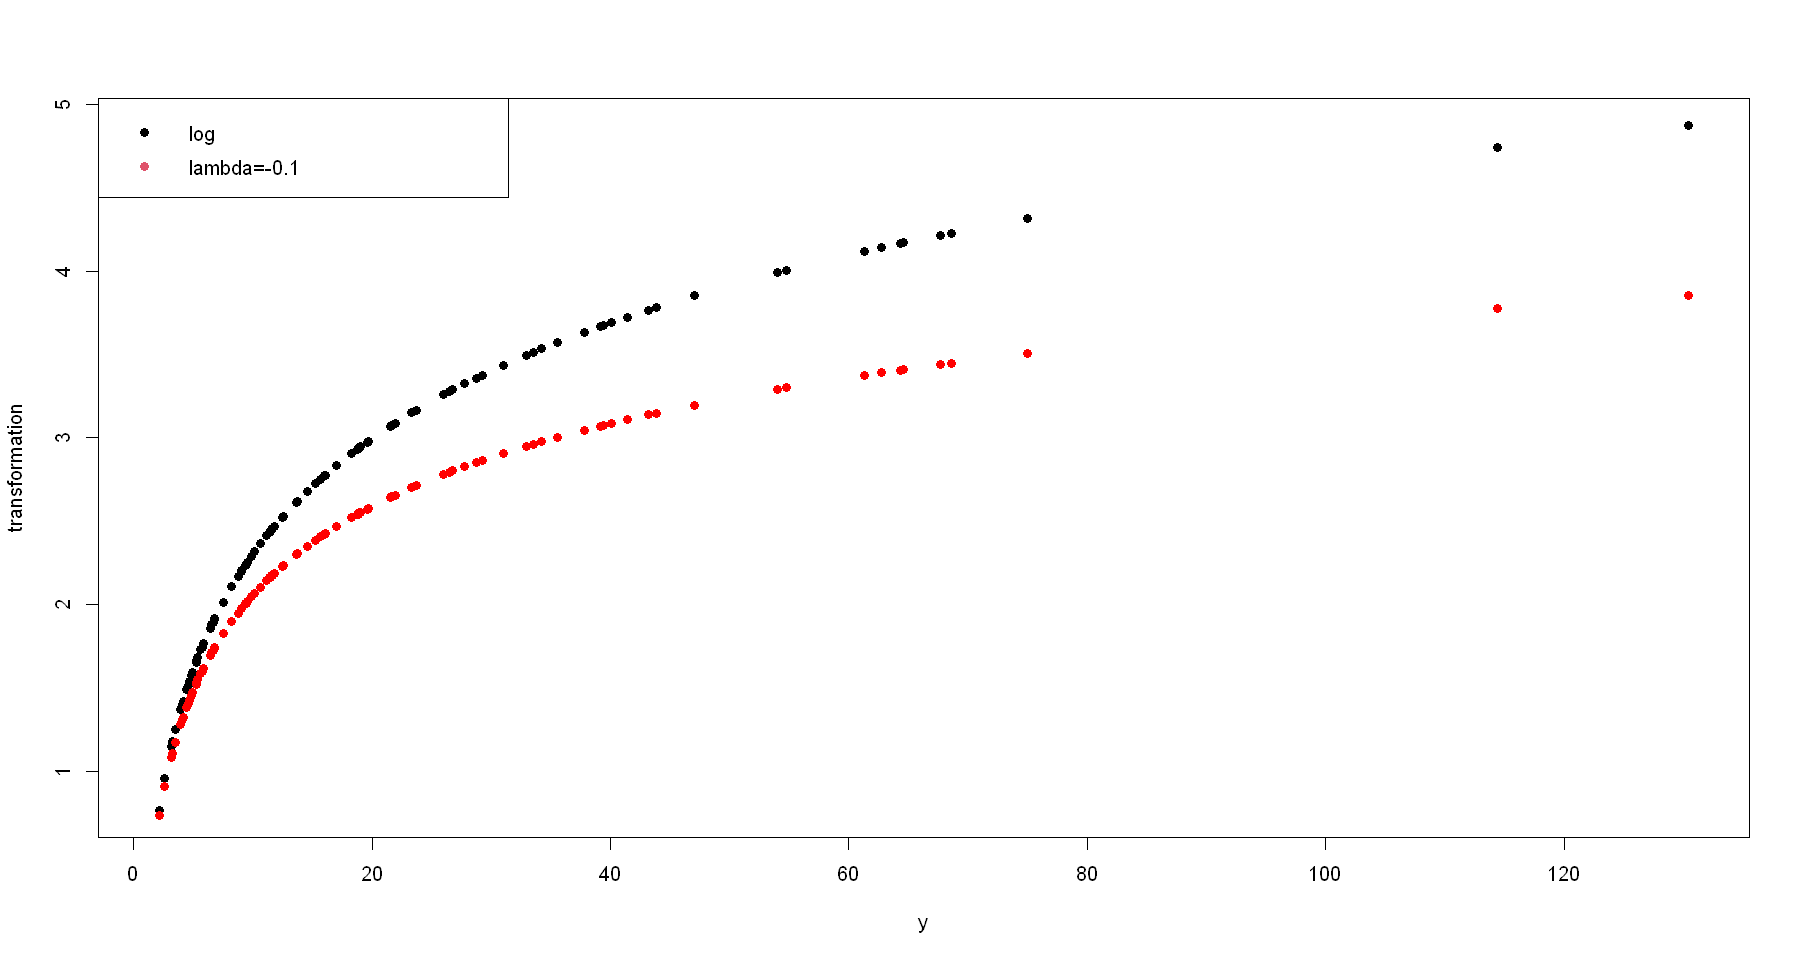

In [63]:
plot(y,log(y), pch=16, ylab="transformation")
points(y,boxcox_y, col='red', pch=16)
legend("topleft", c("log", paste0("lambda=",round(lambda,3))), pch=16, col=1:2)

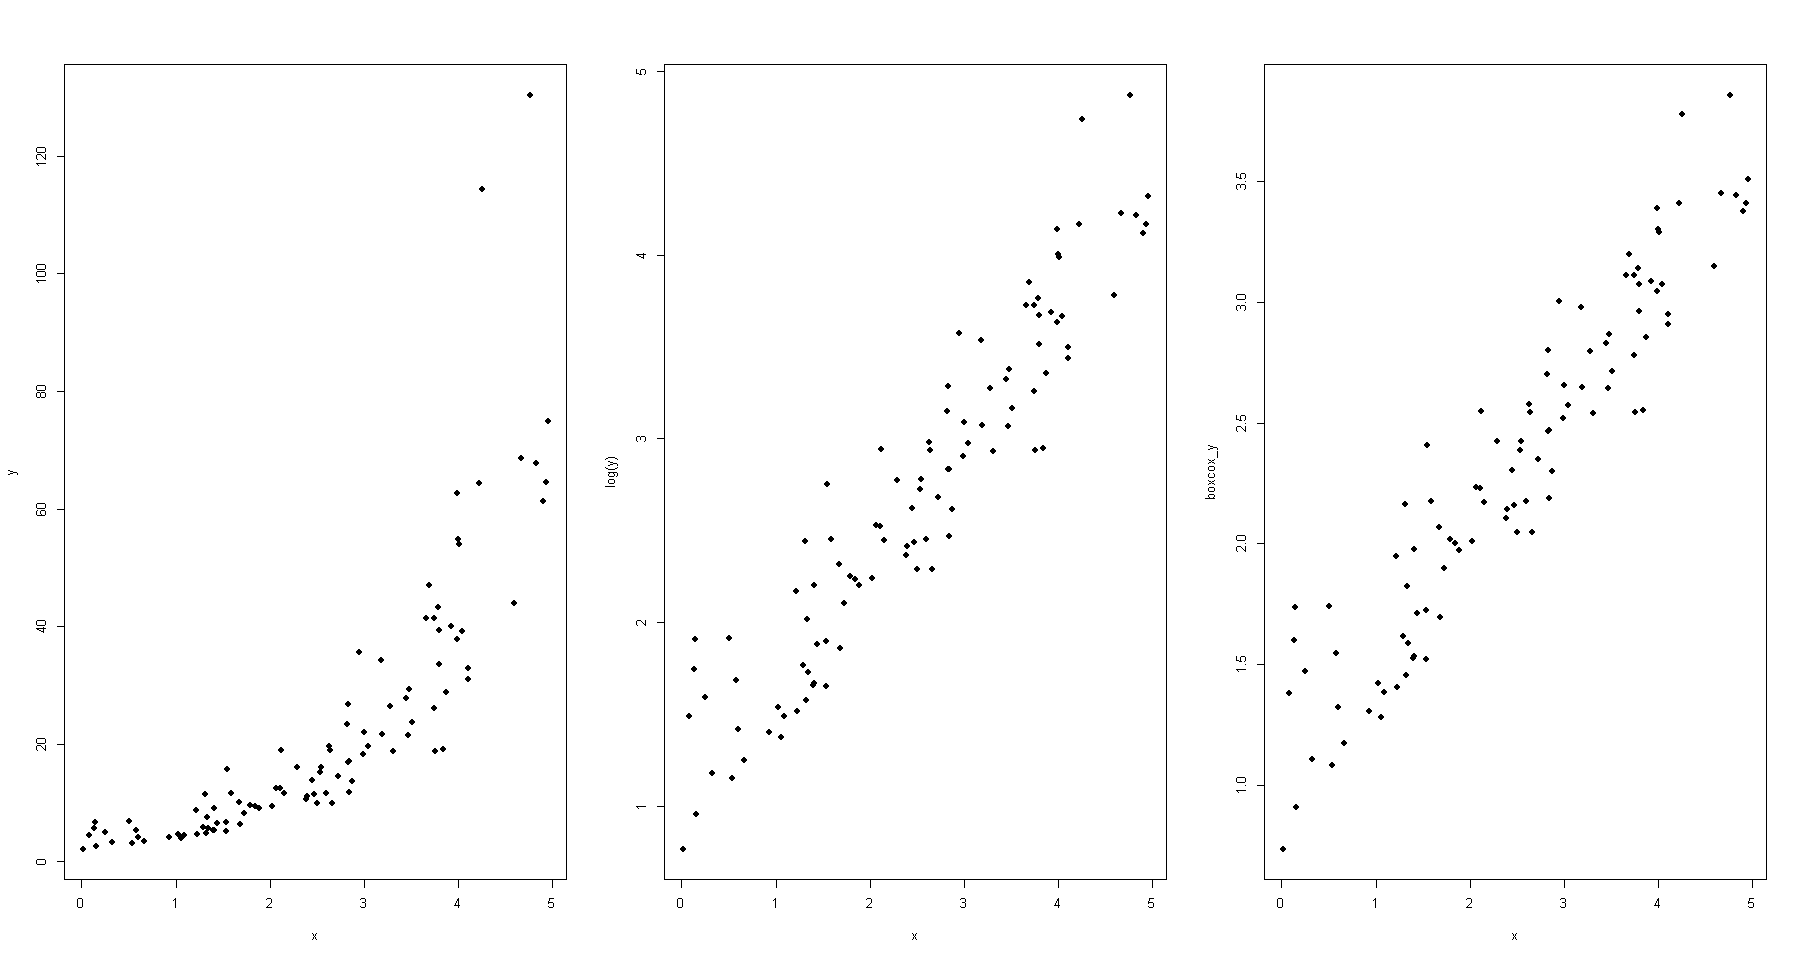

In [64]:
par(mfrow=c(1,3))
plot(x,y,pch=16)
plot(x,log(y),pch=16)
plot(x, boxcox_y, pch=16)


> 큰 차이는 없다.

`-` log 변환

In [65]:
log_y = log(y)
fit <- lm(log_y ~ x)
summary(fit)


Call:
lm(formula = log_y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63464 -0.25116 -0.04324  0.21480  0.88889 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.0586     0.0674   15.71   <2e-16 ***
x             0.6568     0.0238   27.60   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.314 on 98 degrees of freedom
Multiple R-squared:  0.886,	Adjusted R-squared:  0.8848 
F-statistic: 761.7 on 1 and 98 DF,  p-value: < 2.2e-16


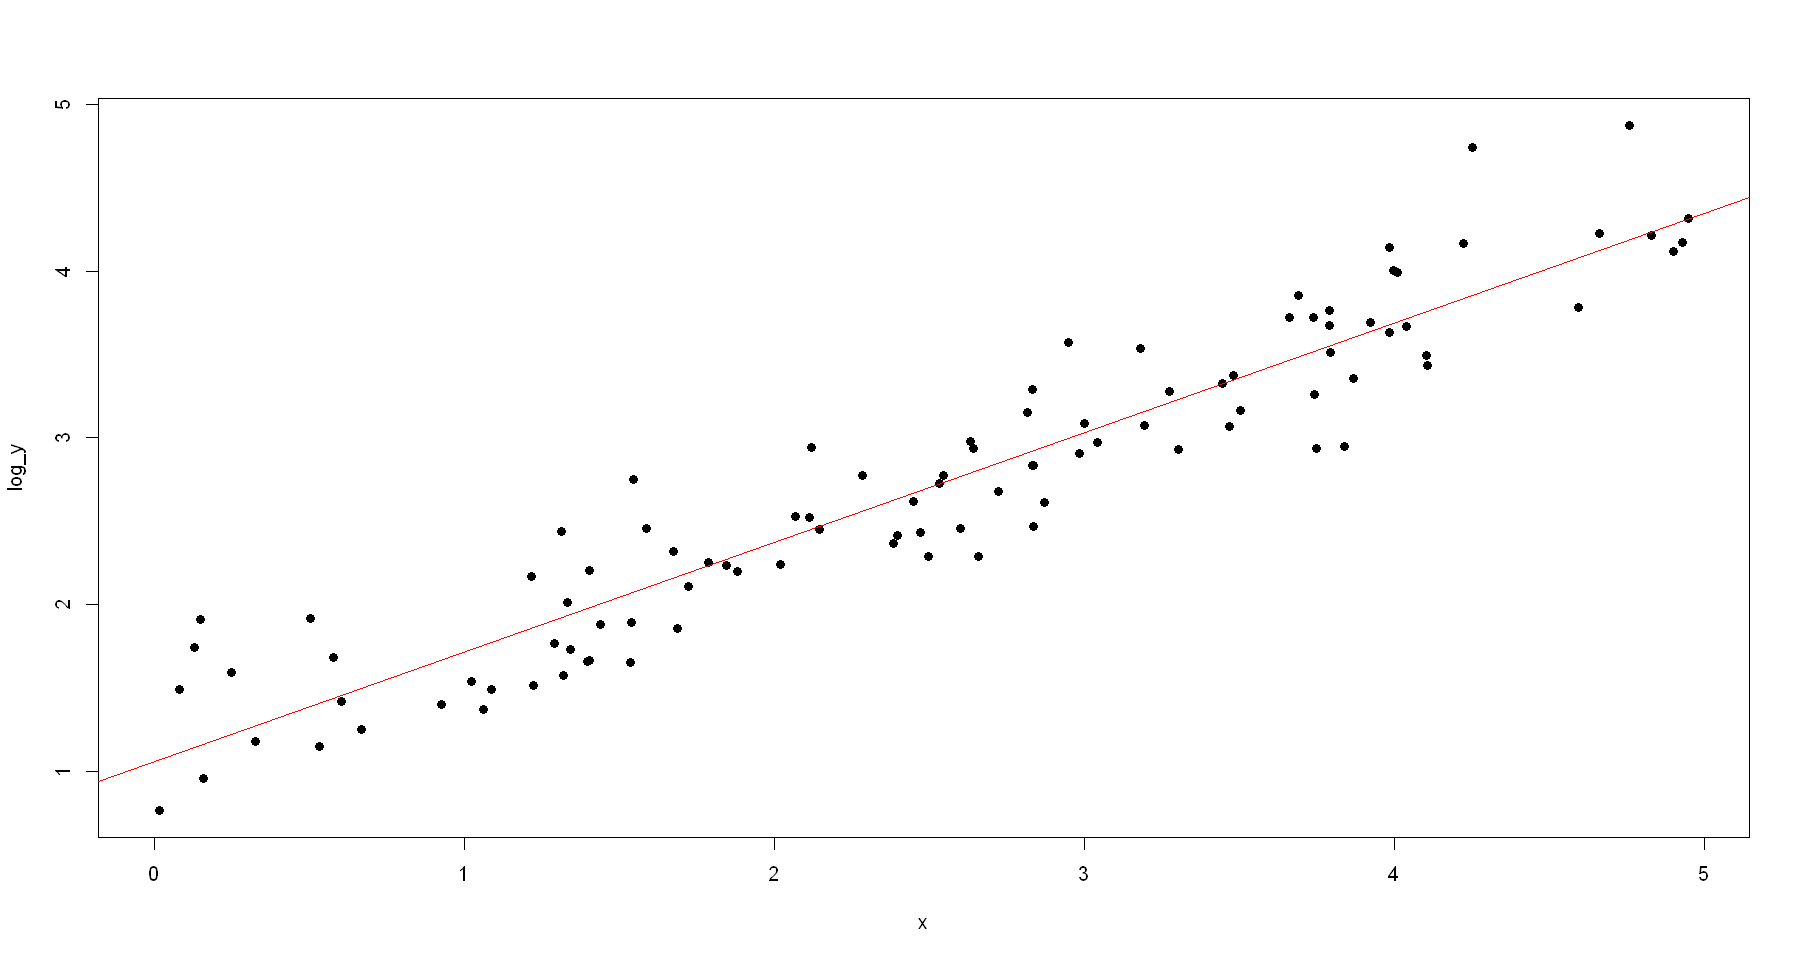

In [66]:
fitted_logy = fitted(fit)  ## fitted() : 파이썬에서의 predict(X)와 유사
plot(x,log_y, pch=16)
abline(fit, col='red')

* 우리는 실제로 `y`를 알고 싶은 것이기에, 역변환을 해줘야 한다.

In [67]:
fitted_y = exp(fitted(fit))
head(cbind(x,y,fitted_y, log_y, fitted_logy))

,x,y,fitted_y,log_y,fitted_logy
1,3.303773,18.74512,25.244870,2.930934,3.228623
2,2.641797,18.85897,16.343318,2.936989,2.793819
3,1.587469,11.63664,8.176861,2.454159,2.101308
4,3.839277,19.02434,35.886332,2.945719,3.580357
5,2.631542,19.64418,16.233609,2.977781,2.787084
6,3.661509,41.39191,31.931525,3.723086,3.463594


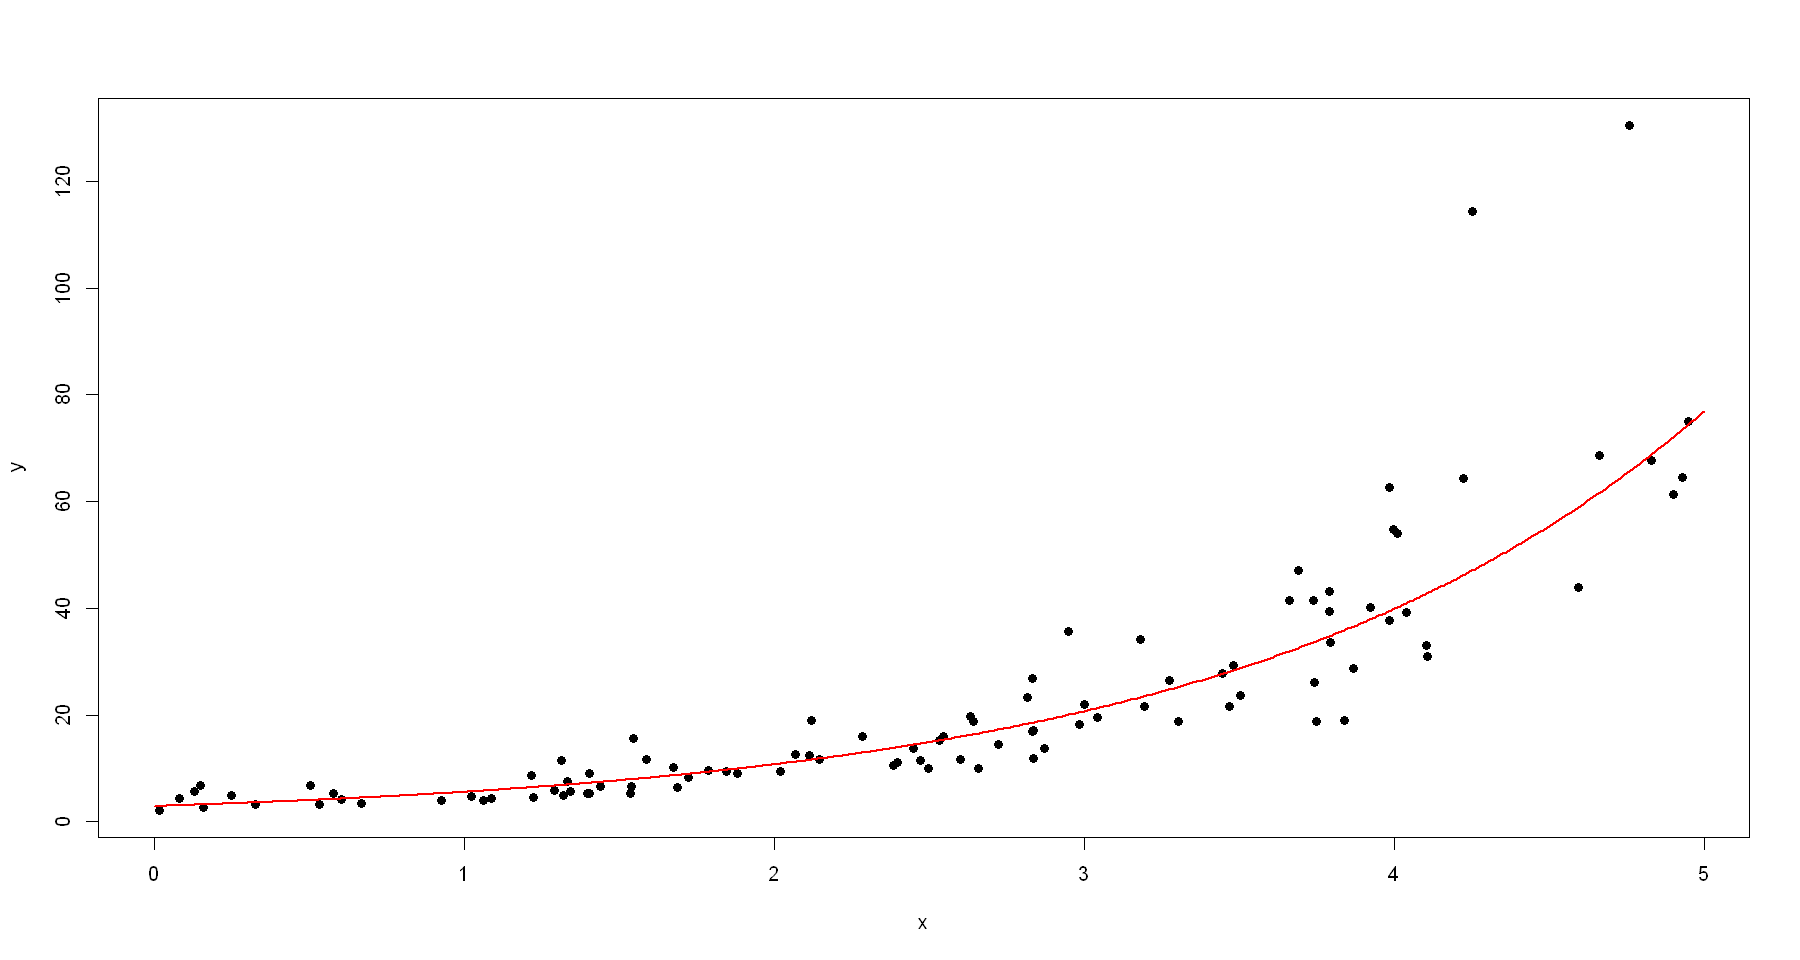

In [68]:
plot_x = seq(0,5,0.01)
plot_y = exp(predict(fit, newdata=data.frame(x=plot_x)))
plot(x,y, pch=16)
lines(plot_x, plot_y, col='red', lwd=2)

> 역변환한 예측값으로 회귀선을 그려보면 나름 잘 되어있다는 것을 알 수 있다.